In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [62]:
#Download the dataset and import into a Pandas DF
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"

In [63]:
df = pd.read_csv(url)

In [64]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [37]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
#Lets do some EDA
1. How much sex wise breakup of tips

<Axes: xlabel='day', ylabel='tip'>

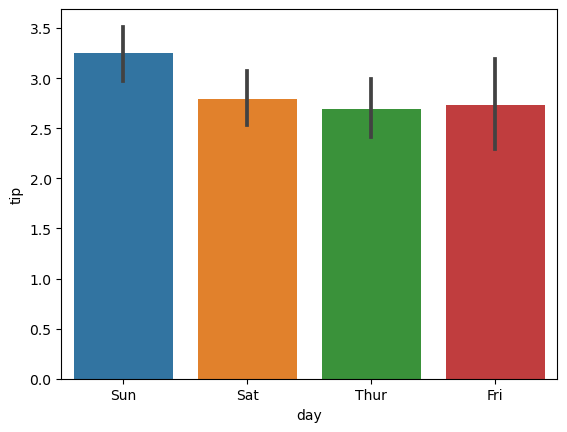

In [55]:
sns.barplot(data=df,x='day',y='tip')

<Axes: xlabel='sex', ylabel='tip'>

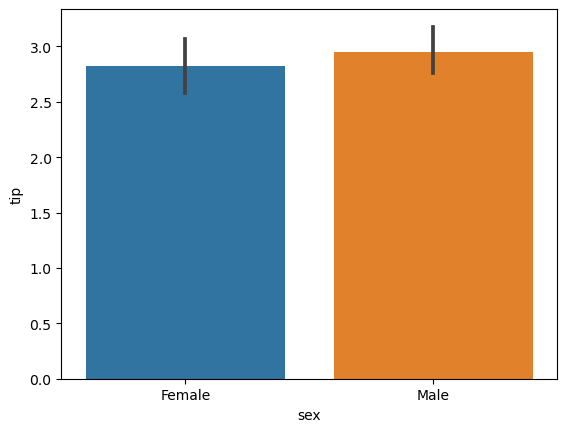

In [54]:
sns.barplot(df,x='sex',y='tip')

#Observations :-
    <br>1.Sex Male has given more tips.</br>
    2. Max tips received on Sunday

In [38]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [80]:
#Lets introduce some missing values 
df.loc[0:4,'tip'] = None

In [81]:
df.loc[0:4]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,NaN,Female,No,Sun,Dinner,2
1,10.34,NaN,Male,No,Sun,Dinner,3
2,21.01,NaN,Male,No,Sun,Dinner,3
3,23.68,NaN,Male,No,Sun,Dinner,2
4,24.59,NaN,Female,No,Sun,Dinner,4


In [82]:
#Find the missing values
df.isnull().sum()

total_bill    0
tip           5
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [83]:
#Fill missing values with median
df['tip'].fillna(df['tip'].median(),inplace=True)

In [84]:
df.isnull().value_counts()

total_bill  tip    sex    smoker  day    time   size 
False       False  False  False   False  False  False    231
Name: count, dtype: int64

In [85]:
#Remove Outliers
Q1= df['total_bill'].quantile(0.25)

In [86]:
Q3 = df['total_bill'].quantile(0.75)

In [87]:
IQR = Q3-Q1

In [88]:
IQR

9.610000000000003

In [89]:
Q1

13.145

In [90]:
Q3

22.755000000000003

In [91]:
#lower and Upper Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3+1.5*IQR
print(lower_bound,upper_bound)

-1.270000000000005 37.17000000000001


<Axes: ylabel='total_bill'>

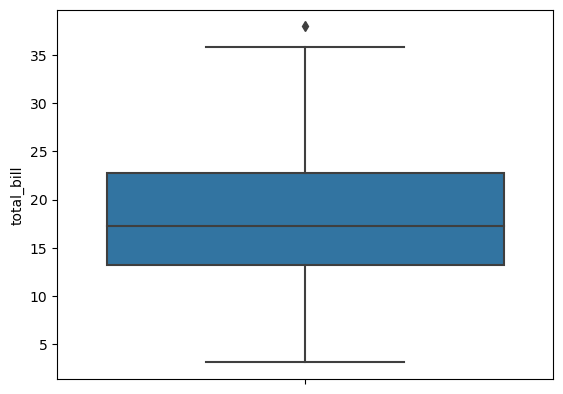

In [92]:
#Lets plot the outliers
sns.boxplot(data=df,y='total_bill')

In [93]:
#remove outliers
df = df[(df['total_bill'] >=lower_bound) & (df['total_bill']<=upper_bound)]

In [94]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,2.715,Female,No,Sun,Dinner,2
1,10.34,2.715,Male,No,Sun,Dinner,3
2,21.01,2.715,Male,No,Sun,Dinner,3
3,23.68,2.715,Male,No,Sun,Dinner,2
4,24.59,2.715,Female,No,Sun,Dinner,4


In [95]:
df.isnull().value_counts()

total_bill  tip    sex    smoker  day    time   size 
False       False  False  False   False  False  False    230
Name: count, dtype: int64

In [56]:
df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [96]:
#Now lets do some feature engineering
#Lets First Normalise the data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['total_bill_scaled'] = scaler.fit_transform(df[['total_bill']])
print(df[['total_bill', 'total_bill_scaled']].head())
df['']

   total_bill  total_bill_scaled
0       16.99           0.424908
1       10.34           0.221917
2       21.01           0.547619
3       23.68           0.629121
4       24.59           0.656899


In [97]:
df['total_bill']

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 230, dtype: float64

In [102]:
#Lets standardise
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df['total_bill_scaled'] = standard_scaler.fit_transform(df[['total_bill']])
print(df[['total_bill', 'total_bill_scaled']].head())

   total_bill  total_bill_scaled
0       16.99          -0.199465
1       10.34          -1.166169
2       21.01           0.384918
3       23.68           0.773053
4       24.59           0.905339
